In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Suppress warnings

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [6]:
df.describe(percentiles=[0.99])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
99%,148.510000,7.700000,4.151000,6.700000,2.500000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

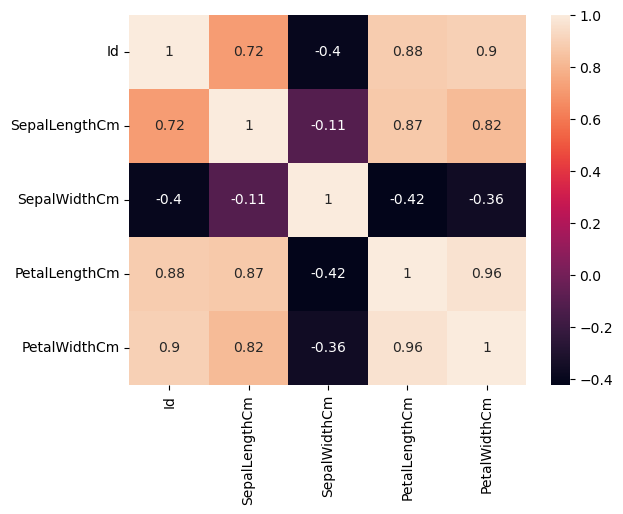

In [8]:
sns.heatmap(df.corr(),annot=True)

### We see here that:-
### Petal Length and Sepal Length are 87%
### Petal Length and Petal Width are 96% Correlated.
### To remove the colinearity and multicolinearity we use PCA.

In [9]:
X = df.drop(['Id','Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y = df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
x = df.copy()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(X)

In [13]:
df_scaled[:5,:]     # (rows:columns)

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Apply PCA on Scaled Data


* It is very important to use standard scaler to scale data before applying PCA.

* Not use any other scaler.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

In [15]:
?PCA

In [16]:
pca.fit_transform(df_scaled)

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

In [17]:
# Eighenvectors
# The number of eigenvectors is equal to the number of variables in the dataset
# Eigenvectors represent the directions of the principal components in PCA

pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [18]:
# Eighenvalues
# Eigenvalues represent the amount of variance explained by each principal component in PCA
# The number of eigenvalues is equal to the number of features.

pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [19]:
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns = ['PC1','PC2','PC3','PC4'])
df_pca

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890
146,1.558492,-0.905314,-0.025382,-0.221322
147,1.520845,0.266795,0.179277,-0.118903
148,1.376391,1.016362,0.931405,-0.024146


In [20]:
df_pca.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-1.517135e-16,-9.041105e-17,-7.555037e-18
PC2,-1.517135e-16,1.000000e+00,-1.390532e-16,-2.056404e-18
PC3,-9.041105e-17,-1.390532e-16,1.000000e+00,6.883639e-17
PC4,-7.555037e-18,-2.056404e-18,6.883639e-17,1.000000e+00


<AxesSubplot:>

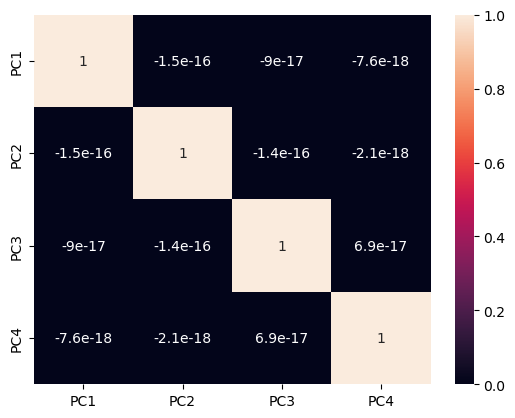

In [21]:
sns.heatmap(df_pca.corr(),annot=True)

### Principal Components doesn't contain colinearity and multicolinearity

# Visualizing Principal Components


* We Visualize Principal Components because to find the number of principal components which contains maximum variance.


* We also visualize that what principal component contain what amount of variance.


* Principal Component = newly created features/columns by PCA

## Bar plot :- To visualize what PC contain what amount of variance

<BarContainer object of 4 artists>

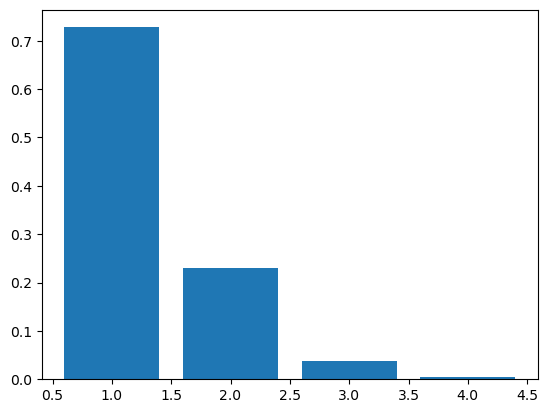

In [22]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

### As we see PC1 contains almost 70% of variance and PC2 contains almost 20% of variance.

## Scree Plot :-  A scree plot shows how much variation each PC captures from the data. The y axis is eigenvalues, which essentially stand for the amount of variation. Use a scree plot to select the principal components to keep.


* y axis- Eigenvalues/Variability value explained/information


* x axis- columns/vectors/ eigenvectors


* A scree plot is a graph that is commonly used in principal component analysis (PCA) to help identify the number of principal components that should be retained in the analysis.


* In PCA, the goal is to reduce the dimensionality of a dataset by finding a smaller number of variables (i.e., principal components) that explain most of the variation in the original data. The scree plot is a graphical representation of the amount of variance explained by each principal component. It plots the eigenvalues of each principal component against the component number, in descending order.

In [23]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

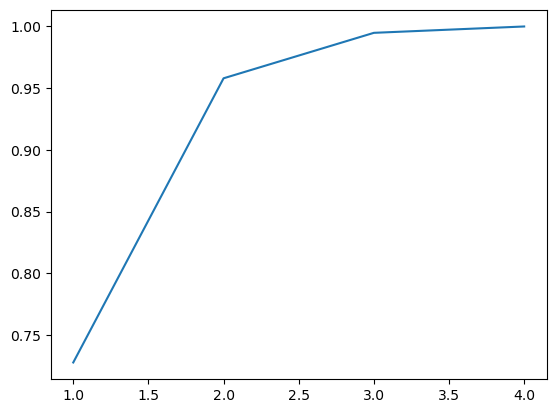

In [24]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

### As we see our 2 PC contains almost 96-98% Variance so we select no. of  PC=2

In [25]:
pc2 = PCA(n_components=2, random_state=42) # It will give only 2 PC and drop all remaining PC

In [26]:
new_df = pc2.fit_transform(df_scaled)

In [27]:
new_df.shape

(150, 2)

## We can select a threshold for proportion of variance. So, PCA gives only those PC which carrying given amount of variance and remove remaing PC's.

In [28]:
pc3 =PCA (0.90)

In [29]:
new_df1 = pc3.fit_transform(df_scaled)

In [30]:
new_df1.shape

(150, 2)

### It gives 2 PC because 2 PC conatins 90% of variance.

### Making a Data Frame of PC

In [31]:
data = pd.DataFrame(new_df, columns = ['PC1','PC2'])
data.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [32]:
pc2.explained_variance_ratio_

array([0.72770452, 0.23030523])

### Concat this PCs with target variable

In [33]:
df_final = pd.concat([data,y],axis=1)
df_final.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize the clusters of dataset on the basis of target categories after applying PCA

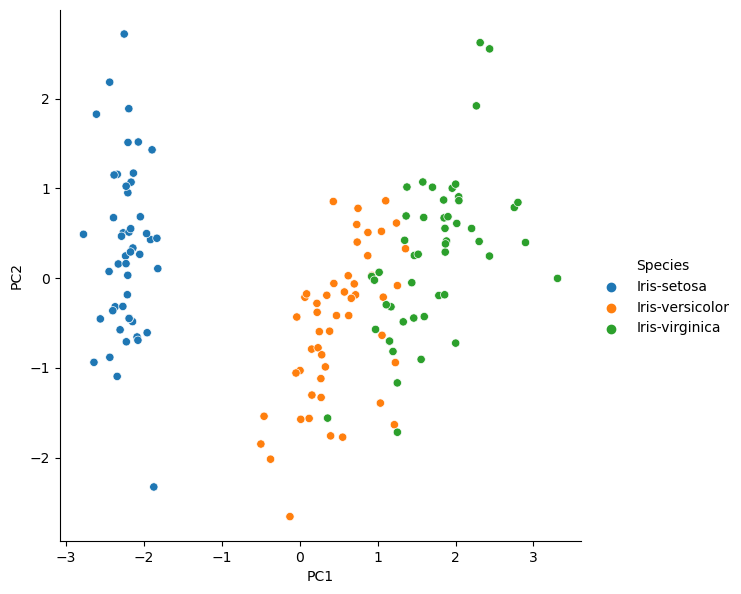

In [34]:
sns.pairplot(data = df_final, x_vars = ['PC1'], y_vars = ['PC2'], hue = 'Species', size = 6)

# OR

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

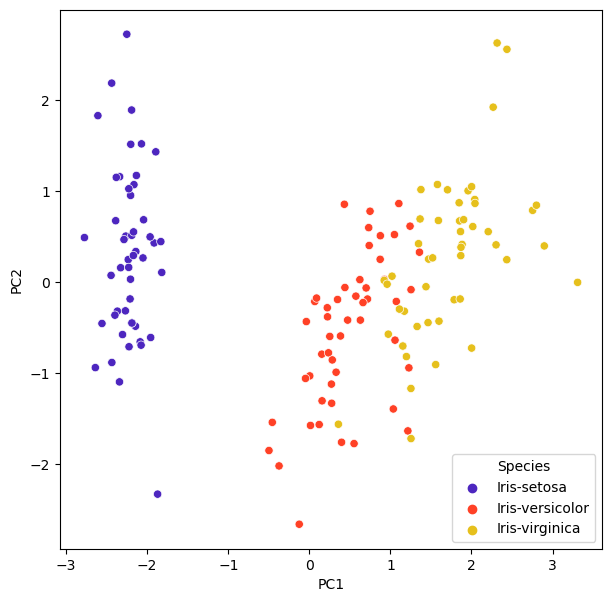

In [35]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_final['PC1'],df_final['PC2'],hue=df_final['Species'],palette='CMRmap')

In [36]:
# Check the correlation of principal components, because Principal Components doesn't contain corrlinearity and multicolinearity

df_final.corr()

,PC1,PC2
PC1,1.000000e+00,-1.517135e-16
PC2,-1.517135e-16,1.000000e+00


<AxesSubplot:>

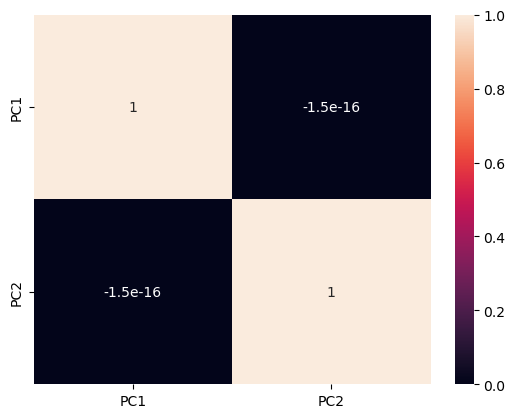

In [37]:
sns.heatmap(df_final.corr(),annot=True)

* Pricipal Components doesn't contain correlation and multicorrelation